In [19]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
color = sns.color_palette()
%matplotlib inline

tr_queries = pd.read_csv('data/train_queries.csv')
te_queries = pd.read_csv('data/test_queries.csv')
tr_plans = pd.read_csv('data/train_plans.csv')
te_plans = pd.read_csv('data/test_plans.csv')
tr_click = pd.read_csv('data/train_clicks.csv')
# t_order = 't_order.csv'
# t_user = 't_user.csv'

In [37]:
from tqdm import tqdm_notebook
import json

In [29]:
train_clicks.tail()

,sid,click_time,click_mode
453331,2429419,2018-11-30 09:52:35,1
453332,1240915,2018-11-22 12:44:59,5
453333,1924734,2018-11-13 07:08:39,2
453334,2975619,2018-11-02 00:27:30,7
453335,1666846,2018-10-23 15:25:20,4


2     136491
7      78209
1      70369
9      48864
5      47480
3      24626
10     14882
4      12606
6      11863
11      6089
8       1857
Name: click_mode, dtype: int64


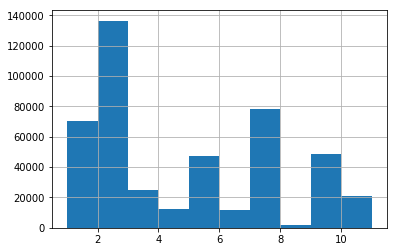

In [11]:
print(train_clicks['click_mode'].value_counts())
# plt.hist(df_click['pid'],rwidth = 0.2)
train_clicks['click_mode'].hist(bins=10) #Series

In [28]:
train_plans.tail()

,sid,plan_time,plans
491049,1686546,2018-10-23 18:36:37,"[{""distance"": 1423, ""price"": """", ""eta"": 427, ""..."
491050,850092,2018-11-26 09:48:50,"[{""distance"": 2759, ""price"": 1400, ""eta"": 1106..."
491051,1603178,2018-10-03 11:45:28,"[{""distance"": 40258, ""price"": 3000, ""eta"": 486..."
491052,165256,2018-10-20 09:47:39,"[{""distance"": 5539, ""price"": 300, ""eta"": 1259,..."
491053,2502376,2018-10-07 20:55:19,"[{""distance"": 9052, ""price"": """", ""eta"": 934, ""..."


In [27]:
train_queries.tail()

,sid,pid,req_time,o,d
499995,3136563,113317.0,2018-10-26 12:53:24,"116.54,40.07","116.38,39.94"
499996,1775691,NaN,2018-10-09 16:40:51,"116.50,40.00","116.58,39.91"
499997,722748,193800.0,2018-10-01 16:46:52,"116.17,39.71","116.20,39.75"
499998,1594185,NaN,2018-10-03 12:27:51,"116.32,40.06","116.16,40.23"
499999,1795967,101673.0,2018-11-29 10:01:13,"116.50,39.89","116.37,39.94"


In [20]:
tr_data = tr_queries.merge(tr_click, on='sid', how='left')
tr_data = tr_data.merge(tr_plans, on='sid', how='left')
tr_data = tr_data.drop(['click_time'], axis=1)
tr_data['click_mode'] = tr_data['click_mode'].fillna(0)

te_data = te_queries.merge(te_plans, on='sid', how='left')
te_data['click_mode'] = -1

data = pd.concat([tr_data, te_data], axis=0)
data = data.drop(['plan_time'], axis=1)
data = data.reset_index(drop=True)
print('total data size: {}'.format(data.shape))
print('raw data columns: {}'.format(', '.join(data.columns)))

D:\zhuangji\anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  if __name__ == '__main__':


total data size: (594358, 7)
raw data columns: click_mode, d, o, pid, plans, req_time, sid


In [22]:
tr_data.tail()

,sid,pid,req_time,o,d,click_mode,plan_time,plans
499995,3136563,113317.0,2018-10-26 12:53:24,"116.54,40.07","116.38,39.94",2.0,2018-10-26 12:53:24,"[{""distance"": 29571, ""price"": 600, ""eta"": 4449..."
499996,1775691,NaN,2018-10-09 16:40:51,"116.50,40.00","116.58,39.91",0.0,NaN,NaN
499997,722748,193800.0,2018-10-01 16:46:52,"116.17,39.71","116.20,39.75",6.0,2018-10-01 16:46:52,"[{""distance"": 7634, ""price"": """", ""eta"": 2308, ..."
499998,1594185,NaN,2018-10-03 12:27:51,"116.32,40.06","116.16,40.23",3.0,2018-10-03 12:27:51,"[{""distance"": 26955, ""price"": """", ""eta"": 2084,..."
499999,1795967,101673.0,2018-11-29 10:01:13,"116.50,39.89","116.37,39.94",4.0,2018-11-29 10:01:13,"[{""distance"": 19329, ""price"": 500, ""eta"": 3787..."


In [23]:
te_data.tail()

,sid,pid,req_time,o,d,plan_time,plans,click_mode
94353,471555,NaN,2018-12-01 22:32:41,"116.34,39.78","116.47,39.95",2018-12-01 22:32:41,"[{""distance"": 28555, ""price"": """", ""eta"": 2366,...",-1
94354,1123933,NaN,2018-12-05 17:44:49,"116.34,39.71","116.34,39.78",2018-12-05 17:44:49,"[{""distance"": 10469, ""price"": """", ""eta"": 2223,...",-1
94355,1409146,162194.0,2018-12-03 12:02:04,"116.25,39.92","116.29,39.91",2018-12-03 12:02:04,"[{""distance"": 6333, ""price"": 500, ""eta"": 2331,...",-1
94356,1338606,NaN,2018-12-04 22:34:20,"116.41,40.06","116.33,39.96",2018-12-04 22:34:20,"[{""distance"": 18235, ""price"": """", ""eta"": 2300,...",-1
94357,1353834,NaN,2018-12-04 11:31:05,"116.41,39.92","116.36,39.88",2018-12-04 11:31:05,"[{""distance"": 9836, ""price"": 600, ""eta"": 3109,...",-1


In [26]:
data.tail()

,click_mode,d,o,pid,plans,req_time,sid
594353,-1.0,"116.47,39.95","116.34,39.78",NaN,"[{""distance"": 28555, ""price"": """", ""eta"": 2366,...",2018-12-01 22:32:41,471555
594354,-1.0,"116.34,39.78","116.34,39.71",NaN,"[{""distance"": 10469, ""price"": """", ""eta"": 2223,...",2018-12-05 17:44:49,1123933
594355,-1.0,"116.29,39.91","116.25,39.92",162194.0,"[{""distance"": 6333, ""price"": 500, ""eta"": 2331,...",2018-12-03 12:02:04,1409146
594356,-1.0,"116.33,39.96","116.41,40.06",NaN,"[{""distance"": 18235, ""price"": """", ""eta"": 2300,...",2018-12-04 22:34:20,1338606
594357,-1.0,"116.36,39.88","116.41,39.92",NaN,"[{""distance"": 9836, ""price"": 600, ""eta"": 3109,...",2018-12-04 11:31:05,1353834


In [30]:
def gen_od_feas(data):
    data['o1'] = data['o'].apply(lambda x: float(x.split(',')[0]))
    data['o2'] = data['o'].apply(lambda x: float(x.split(',')[1]))
    data['d1'] = data['d'].apply(lambda x: float(x.split(',')[0]))
    data['d2'] = data['d'].apply(lambda x: float(x.split(',')[1]))
    data = data.drop(['o', 'd'], axis=1)
    return data

In [31]:
data = gen_od_feas(data)

In [32]:
data.tail()

,click_mode,pid,plans,req_time,sid,o1,o2,d1,d2
594353,-1.0,NaN,"[{""distance"": 28555, ""price"": """", ""eta"": 2366,...",2018-12-01 22:32:41,471555,116.34,39.78,116.47,39.95
594354,-1.0,NaN,"[{""distance"": 10469, ""price"": """", ""eta"": 2223,...",2018-12-05 17:44:49,1123933,116.34,39.71,116.34,39.78
594355,-1.0,162194.0,"[{""distance"": 6333, ""price"": 500, ""eta"": 2331,...",2018-12-03 12:02:04,1409146,116.25,39.92,116.29,39.91
594356,-1.0,NaN,"[{""distance"": 18235, ""price"": """", ""eta"": 2300,...",2018-12-04 22:34:20,1338606,116.41,40.06,116.33,39.96
594357,-1.0,NaN,"[{""distance"": 9836, ""price"": 600, ""eta"": 3109,...",2018-12-04 11:31:05,1353834,116.41,39.92,116.36,39.88


In [36]:
data['plans'][0]

'[{"distance": 5219, "price": 300, "eta": 1367, "transport_mode": 9}, {"distance": 4537, "price": "", "eta": 1035, "transport_mode": 3}, {"distance": 4537, "price": 2100, "eta": 1095, "transport_mode": 4}, {"distance": 4118, "price": "", "eta": 1243, "transport_mode": 6}, {"distance": 5219, "price": 300, "eta": 1679, "transport_mode": 2}, {"distance": 4046, "price": "", "eta": 3672, "transport_mode": 5}]'

In [98]:
n = data.shape[0]
mode_list_feas = np.zeros((n, 22))
speed, pricePerDis = np.zeros((n,11)), np.zeros((n,11))
for i, plan in tqdm_notebook(enumerate(data['plans'].values)):
#     if i == 5:
#         break
    try:
        cur_plan_list = json.loads(plan)
    except:
        cur_plan_list = []
    if len(cur_plan_list) == 0:
        speed[i] = speed[i]-1
        pricePerDis[i] = pricePerDis[i]-1
    else:
        for tmp_dit in cur_plan_list:
#             print(tmp_dit['distance'])
#             print(tmp_dit['eta'])
            _speed = round(int(tmp_dit['distance'])/int(tmp_dit['eta']) , 2)
            if tmp_dit['price'] == '':
                tmp_dit['price'] = 0
            _pricePerDis = round(int(tmp_dit['price'])/int(tmp_dit['distance']), 2)
            speed[i][int(tmp_dit['transport_mode'])-1] = _speed
            pricePerDis[i][int(tmp_dit['transport_mode'])-1] = _pricePerDis

In [105]:
feature_data = pd.DataFrame(mode_list_feas)
feature_data.columns = ['fea_{}'.format(i) for i in range(22)]

In [117]:
for i in range(22):
    if i%2 == 0:
        feature_data['fea_{}'.format(i)] = speed[:,int(i/2)]
    else:
        feature_data['fea_{}'.format(i)] = pricePerDis[:,int(i/2)]

In [119]:
data = pd.concat([data, feature_data], axis=1)

In [122]:
data = data.drop(['plans'], axis=1)

In [125]:
from sklearn.decomposition import TruncatedSVD
def read_profile_data():
    profile_data = pd.read_csv('data/profiles.csv')
    profile_na = np.zeros(67)
    profile_na[0] = -1
    profile_na = pd.DataFrame(profile_na.reshape(1, -1))
    profile_na.columns = profile_data.columns
    profile_data = profile_data.append(profile_na)
    return profile_data

profile_data = read_profile_data()
x = profile_data.drop(['pid'], axis=1).values
svd = TruncatedSVD(n_components=20, n_iter=20, random_state=2019)
svd_x = svd.fit_transform(x)
svd_feas = pd.DataFrame(svd_x)
svd_feas.columns = ['svd_fea_{}'.format(i) for i in range(20)]
svd_feas['pid'] = profile_data['pid'].values
data['pid'] = data['pid'].fillna(-1)
data = data.merge(svd_feas, on='pid', how='left')

In [127]:
data['req_time'] = pd.to_datetime(data['req_time'])
data['weekday'] = data['req_time'].dt.dayofweek
data['hour'] = data['req_time'].dt.hour
data = data.drop(['req_time'], axis=1)

In [128]:
data.to_csv("data.csv")

In [130]:
train_data = data[data['click_mode'] != -1]
test_data = data[data['click_mode'] == -1]
submit = test_data[['sid']].copy()
train_data = train_data.drop(['sid', 'pid'], axis=1)
test_data = test_data.drop(['sid', 'pid'], axis=1)
test_data = test_data.drop(['click_mode'], axis=1)
train_y = train_data['click_mode'].values
train_x = train_data.drop(['click_mode'], axis=1)

In [137]:
train_x.columns

Index(['o1', 'o2', 'd1', 'd2', 'fea_0', 'fea_1', 'fea_2', 'fea_3', 'fea_4',
       'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11',
       'fea_12', 'fea_13', 'fea_14', 'fea_15', 'fea_16', 'fea_17', 'fea_18',
       'fea_19', 'fea_20', 'fea_21', 'svd_fea_0', 'svd_fea_1', 'svd_fea_2',
       'svd_fea_3', 'svd_fea_4', 'svd_fea_5', 'svd_fea_6', 'svd_fea_7',
       'svd_fea_8', 'svd_fea_9', 'svd_fea_10', 'svd_fea_11', 'svd_fea_12',
       'svd_fea_13', 'svd_fea_14', 'svd_fea_15', 'svd_fea_16', 'svd_fea_17',
       'svd_fea_18', 'svd_fea_19', 'weekday', 'hour'],
      dtype='object')

In [138]:
feature_columns_to_use = ['o1', 'o2', 'd1', 'd2', 'fea_0', 'fea_1', 'fea_2', 'fea_3', 'fea_4',
       'fea_5', 'fea_6', 'fea_7', 'fea_8', 'fea_9', 'fea_10', 'fea_11',
       'fea_12', 'fea_13', 'fea_14', 'fea_15', 'fea_16', 'fea_17', 'fea_18',
       'fea_19', 'fea_20', 'fea_21', 'svd_fea_0', 'svd_fea_1', 'svd_fea_2',
       'svd_fea_3', 'svd_fea_4', 'svd_fea_5', 'svd_fea_6', 'svd_fea_7',
       'svd_fea_8', 'svd_fea_9', 'svd_fea_10', 'svd_fea_11', 'svd_fea_12',
       'svd_fea_13', 'svd_fea_14', 'svd_fea_15', 'svd_fea_16', 'svd_fea_17',
       'svd_fea_18', 'svd_fea_19', 'weekday', 'hour']
train_for_matrix = train_x[feature_columns_to_use]
test_for_matrix = test_data[feature_columns_to_use]
train_X = train_for_matrix.as_matrix()
test_X = test_for_matrix.as_matrix()
train_y

D:\zhuangji\anaconda\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # This is added back by InteractiveShellApp.init_path()
D:\zhuangji\anaconda\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if sys.path[0] == '':


array([9., 1., 9., ..., 6., 3., 4.])

In [140]:
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import f1_score
from time import gmtime, strftime

In [ ]:
gbm = xgb.XGBClassifier(silent=1, max_depth=10, n_estimators=1000, learning_rate=0.05)
gbm.fit(train_X, train_y)

In [ ]:
predictions = gbm.predict(test_X)

In [ ]:
now_time = strftime("%Y-%m-%d-%H-%M-%S", gmtime())
submit['mode'] = predictions
submit.to_csv(
        'submit/{}_result_{}.csv'.format(model_name, now_time), index=False)